# ***Processing with Cs-137 activity concentration data in stem woody biomass for forest sites***

# Load all data from .xlsx file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load biomass dataset
site_data = '/home/dima/Desktop/JupyterLab/GIS and ML algoritms/4_RN_content_in_wood/Unit_site_data.xlsx'
df = pd.read_excel(site_data, sheet_name='RN_filtration_data')
df.head()

,Ідентифікатор,Site #,Species,Species_ID,Ntrees at site,% composition,D_cm,H_m,G_m2_ha,N_ha,...,T_ag_Cs,ln_T_ag_Cs,T_ag_Sr,ln_T_ag_Sr,AEDR_count,AEDR_mean,AEDR_median,AEDR_std,Distance_km,Azimuth
0,214,095_2021,Pine,0,40,100.000000,9.173331,8.917017,26.454278,4000,...,0.009303,-4.677466,17.136062,2.841185,30,0.141667,0.14,0.009339,51.395430,246
1,472,060_2021,Robinia,5,39,42.287838,10.248202,20.161437,12.869754,1560,...,0.015607,-4.160037,6.328208,1.845017,21,10.249524,10.20,0.923954,33.428831,254
2,218,096_2021,Birch,2,35,100.000000,17.188036,20.614192,32.488588,1400,...,0.016439,-4.108084,0.800387,-0.222660,26,0.381538,0.39,0.044522,54.895591,247
3,430,051_2021,Pine,0,24,100.000000,22.133120,13.684873,36.940844,960,...,0.018700,-3.979215,4.799847,1.568584,31,0.552581,0.56,0.071300,17.571824,265
4,204,092_2021,Birch,2,41,100.000000,28.217794,27.000746,25.643676,410,...,0.019196,-3.953053,2.440077,0.892029,34,0.204412,0.20,0.017689,51.095388,246


In [3]:
# Selecting main working parameters
select = pd.DataFrame(df, columns= ['Species', 'Species_ID', '% composition', 'D_cm', 'H_m', 'G_m2_ha',
                                    'Origin', 'Origin_ID','A_year', 'D_live_cm', 'H_live_m', 'G_live_m2_ha',
                                    'F_Soil_ID', 'M_Soil', 'AEDR_mean', 'Distance_km', 'Azimuth',
                                    'Cs_2021_kBq_m', 'Sr_2021_kBq_m', 'A_Cs, Bq/kg', 'A_Sr, Bq/kg'])
'''
In "Species_ID" column: "0" is Pine, "1" is Spruce, "2" is Birch, "3" is Alder, "4" is Aspen, "5" is Oak
In "Origin_ID" column: "0.0" is nutural stand, "1.0" is artificial stand
'''

# Show the first five columns
select.head()

,Species,Species_ID,% composition,D_cm,H_m,G_m2_ha,Origin,Origin_ID,A_year,D_live_cm,...,G_live_m2_ha,F_Soil_ID,M_Soil,AEDR_mean,Distance_km,Azimuth,Cs_2021_kBq_m,Sr_2021_kBq_m,"A_Cs, Bq/kg","A_Sr, Bq/kg"
0,Pine,0,100.000000,9.173331,8.917017,26.454278,n,0,20,9.173331,...,26.454278,3,2,0.141667,51.395430,246,752.481287,9.803886,7.0,168.0
1,Robinia,5,42.287838,10.248202,20.161437,12.869754,n,0,40,13.518680,...,30.433701,3,3,10.249524,33.428831,254,5189.986119,225.972345,81.0,1430.0
2,Birch,2,100.000000,17.188036,20.614192,32.488588,n,0,30,17.188036,...,32.488588,2,3,0.381538,54.895591,247,1034.110727,17.866359,17.0,14.3
3,Pine,0,100.000000,22.133120,13.684873,36.940844,n,0,20,22.133120,...,36.940844,2,2,0.552581,17.571824,265,588.225430,144.587942,11.0,694.0
4,Birch,2,100.000000,28.217794,27.000746,25.643676,a,1,57,28.217794,...,25.643676,2,2,0.204412,51.095388,246,677.224124,12.294696,13.0,30.0


# Pre-analysis of parameters

In [4]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Species        209 non-null    object 
 1   Species_ID     209 non-null    int64  
 2   % composition  209 non-null    float64
 3   D_cm           209 non-null    float64
 4   H_m            209 non-null    float64
 5   G_m2_ha        209 non-null    float64
 6   Origin         209 non-null    object 
 7   Origin_ID      209 non-null    int64  
 8   A_year         209 non-null    int64  
 9   D_live_cm      209 non-null    float64
 10  H_live_m       209 non-null    float64
 11  G_live_m2_ha   209 non-null    float64
 12  F_Soil_ID      209 non-null    int64  
 13  M_Soil         209 non-null    int64  
 14  AEDR_mean      209 non-null    float64
 15  Distance_km    209 non-null    float64
 16  Azimuth        209 non-null    int64  
 17  Cs_2021_kBq_m  209 non-null    float64
 18  Sr_2021_kB

In [5]:
# Descriptive statistics of main parameters
select.describe()

,Species_ID,% composition,D_cm,H_m,G_m2_ha,Origin_ID,A_year,D_live_cm,H_live_m,G_live_m2_ha,F_Soil_ID,M_Soil,AEDR_mean,Distance_km,Azimuth,Cs_2021_kBq_m,Sr_2021_kBq_m,"A_Cs, Bq/kg","A_Sr, Bq/kg"
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,2.090000e+02
mean,1.057416,94.337925,17.770981,16.978858,30.000765,0.454545,47.464115,17.555614,16.999369,31.436810,1.918660,2.220096,2.526858,14.640059,174.296651,2040.059453,670.875816,2715.828230,1.460083e+04
std,1.524339,14.155594,8.921738,6.832292,15.907971,0.499125,24.724635,8.470174,6.783414,15.470759,0.634039,0.692944,4.756383,12.363729,99.912885,3821.573719,1529.917216,8041.339665,7.762897e+04
min,0.000000,20.805369,1.914854,2.704460,0.259356,0.000000,10.000000,1.874874,2.704460,0.656684,1.000000,0.000000,0.110000,3.998568,9.000000,28.815348,2.402062,4.500000,1.110000e+01
25%,0.000000,96.775081,11.601519,12.401789,17.519173,0.000000,30.000000,12.307179,12.193980,20.938452,2.000000,2.000000,0.460000,6.562497,56.000000,446.906289,44.007562,61.000000,3.150000e+02
50%,0.000000,100.000000,16.817809,17.466646,30.845307,0.000000,45.000000,16.780740,17.365162,31.800484,2.000000,2.000000,0.756000,9.203749,189.000000,708.799781,187.465954,550.000000,1.820000e+03
75%,2.000000,100.000000,22.264253,21.414562,42.817263,1.000000,60.000000,22.023624,21.604236,43.193896,2.000000,3.000000,2.401667,20.865459,261.000000,1940.992207,442.523198,1490.000000,6.950000e+03
max,5.000000,100.000000,52.228464,34.048688,66.922093,1.000000,150.000000,41.664506,33.436497,71.679126,3.000000,4.000000,36.591739,57.286577,342.000000,25173.384978,10477.431302,86400.000000,1.050000e+06


In [6]:
# Discribe statistic of forest sites by species and origin
df.groupby(["Species","Origin"])["A_Cs, Bq/kg","A_Sr, Bq/kg"].describe()

/tmp/ipykernel_4417/1143735144.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(["Species","Origin"])["A_Cs, Bq/kg","A_Sr, Bq/kg"].describe()


A_Cs, Bq/kg                                              \
                     count          mean           std    min      25%   
Species Origin                                                           
Alder   n             13.0   1645.384615   3012.117625   27.0   344.00   
Aspen   n              9.0  11170.111111  28524.501891   15.0    27.00   
Birch   a              8.0   1436.875000   3825.098260   13.0    17.00   
        n             37.0   2653.702703   6025.865447    8.0    89.00   
Oak     a              4.0  11312.250000  11544.614917   49.0  3687.25   
        n              3.0    920.333333   1237.816761   11.0   215.50   
Pine    a             79.0   2339.096203   5611.184745    4.6   176.50   
        n             51.0   2016.539216   5505.888031    4.5    44.00   
Red oak a              3.0     35.000000     19.078784   17.0    25.00   
Robinia n              1.0     81.000000           NaN   81.0    81.00   
Spruce  a              1.0    177.000000           NaN  177.0   177.00   

                                          A_Sr, Bq/kg                \
                   50%       75%      max       count          mean   
Species Origin                                                        
Alder   n        420.0   1033.00  10800.0        13.0    876.307692   
Aspen   n         67.0    837.00  86400.0         9.0  17176.111111   
Birch   a         25.5    248.25  10900.0         8.0  21309.625000   
        n        580.0   1490.00  30700.0        37.0  37961.359459   
Oak     a       9450.0  17075.00  26300.0         4.0  19732.750000   
        n        420.0   1375.00   2330.0         3.0   1039.333333   
Pine    a        908.0   1660.00  35200.0        79.0   7681.659494   
        n        287.0   1045.00  30600.0        51.0  12107.411765   
Red oak a         33.0     44.00     55.0         3.0    114.000000   
Robinia n         81.0     81.00     81.0         1.0   1430.000000   
Spruce  a        177.0    177.00    177.0         1.0   2400.000000   

                                                                            
                          std     min      25%     50%      75%        max  
Species Origin                                                              
Alder   n          815.259405    60.0    85.00   546.0   1460.0     2100.0  
Aspen   n        29330.875402   101.0   183.00  2620.0   7200.0    71700.0  
Birch   a        54522.275993    30.0   171.50   270.5   5555.0   156000.0  
        n       172221.102648    14.3   966.00  2500.0   8070.0  1050000.0  
Oak     a        32260.610196    51.0  2532.75  5490.0  22690.0    67900.0  
        n         1190.664240    48.0   379.00   710.0   1535.0     2360.0  
Pine    a        14934.295459    11.1   542.00  3050.0   7315.0    87400.0  
        n        46628.041232    75.0   449.50  1010.0   4140.0   323600.0  
Red oak a           39.887341    83.0    91.50   100.0    129.5      159.0  
Robinia n                 NaN  1430.0  1430.00  1430.0   1430.0     1430.0  
Spruce  a                 NaN  2400.0  2400.00  2400.0   2400.0     2400.0

In [7]:
# Delete empty rows from the working column in a dataframe
nan_value = float("NaN")
select.replace("", nan_value, inplace=True)
select.dropna(subset = ["A_Cs, Bq/kg"], inplace=True) # IMPOTANT - input name of column
print(select)

     Species  Species_ID  % composition       D_cm        H_m    G_m2_ha  \
0       Pine           0     100.000000   9.173331   8.917017  26.454278   
1    Robinia           5      42.287838  10.248202  20.161437  12.869754   
2      Birch           2     100.000000  17.188036  20.614192  32.488588   
3       Pine           0     100.000000  22.133120  13.684873  36.940844   
4      Birch           2     100.000000  28.217794  27.000746  25.643676   
..       ...         ...            ...        ...        ...        ...   
204     Pine           0     100.000000  13.411189  13.346519  28.256274   
205    Birch           2      28.448276   1.914854   4.359681   0.259356   
206    Aspen           4      99.930119  11.401754  14.676282  17.972410   
207     Pine           0      96.284658  16.557714  17.797635  32.733666   
208     Pine           0     100.000000  13.427365  16.722719  48.177280   

    Origin  Origin_ID  A_year  D_live_cm  ...  G_live_m2_ha  F_Soil_ID  \
0        n   

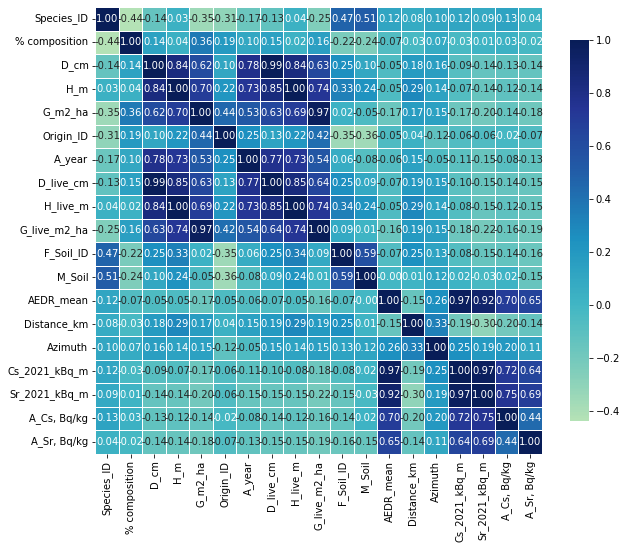

In [8]:
# Correlation matrix

import seaborn as sns # for correlation heatmap

def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}
                )
    plt.show();
    
correlation_heatmap(select)

# Selecting working columns for the XGBoost algorithms

In [9]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns= ['Species_ID', 'D_cm', 'H_m', 'G_m2_ha',
                                    'A_year', 'F_Soil_ID', 'AEDR_mean', 'Distance_km', 'Azimuth'])
y = pd.DataFrame(select, columns= ['A_Cs, Bq/kg'])

In [10]:
# Add to 'X' data colection new colomns with sintetic/random data: selest "Yes" or "No".
question=input("Choose an option - Add a synthetic column with random values!!! (Yes or No):")

if question == 'Yes':
    count = y.count()
    norm_value = np.random.normal(10, 2, size=count)
    X['Random_col'] = norm_value
    print('Selected "Yes"!!! A new column with random values was created.')
elif question == 'No':
    print('Selected "No"!!! A new column with random values was not created.')
else:
    print('Error!!! Typed no corectly text!!!')

Choose an option - Add a synthetic column with random values!!! (Yes or No): No


Selected "No"!!! A new column with random values was not created.


In [11]:
# Columns in "X" data collections
X.head()

,Species_ID,D_cm,H_m,G_m2_ha,A_year,F_Soil_ID,AEDR_mean,Distance_km,Azimuth
0,0,9.173331,8.917017,26.454278,20,3,0.141667,51.395430,246
1,5,10.248202,20.161437,12.869754,40,3,10.249524,33.428831,254
2,2,17.188036,20.614192,32.488588,30,2,0.381538,54.895591,247
3,0,22.133120,13.684873,36.940844,20,2,0.552581,17.571824,265
4,2,28.217794,27.000746,25.643676,57,2,0.204412,51.095388,246


In [12]:
# Columns in "y" data collections
y.head()

,"A_Cs, Bq/kg"
0,7.0
1,81.0
2,17.0
3,11.0
4,13.0


# Create first XGBoost model for estimate varibiality of output stats

In [13]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [14]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [20]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [21]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=4, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [0.838591473803092, 0.43547737823043653, 0.37566601499267105, 0.48220706793837553]
    Mean: 0.533
    Std: 0.180

 --------------------
Root-mean-square error (RMSE): 

    Scores: [ 3591.67501232  2905.40712575  3989.54331638 10649.24654092]
    Mean: 5283.968
    Std: 3121.825

 --------------------
Mean absolute error (MAE): 

    Scores: [2204.2288053278653, 982.34451682751, 1897.3274520910704, 2182.862569478842]
    Mean: 1816.691
    Std: 496.715

 --------------------


# Find optimal hyperparameters for XGBoost model

In [22]:
# Create function for present of hyperparameters and main scores
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            global hps
            hps =  results['params'][candidate]
            print("")

In [23]:
# Tuning XGBoost parameters
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", eval_metric="rmse")
params = {
    "colsample_bytree": uniform(0.05, 0.9),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.01, 0.3), # default 0.1 
    "max_depth": randint(2, 5), # default 3
    "n_estimators": randint(50, 200), # default 100
    "subsample": uniform(0.3, 0.7)
}

search = RandomizedSearchCV(xgb_model, param_distributions=params, n_iter=3000, cv=5, verbose=1, n_jobs=1, return_train_score=True)

search.fit(X, y)

report_best_scores(search.cv_results_, 1)

Fitting 5 folds for each of 3000 candidates, totalling 15000 fits
Model with rank: 1
Mean validation score: -7.258 (std: 13.261)
Parameters: {'colsample_bytree': 0.42064796781880964, 'gamma': 0.08192139054801456, 'learning_rate': 0.010639341826045425, 'max_depth': 4, 'n_estimators': 58, 'subsample': 0.7461627067276967}



In [24]:
# All output data for XGBoost models after tuning parameters
print(search.cv_results_)

{'mean_fit_time': array([0.81646452, 0.69070773, 1.0842905 , ..., 0.54542847, 0.33509459,
       0.50611677]), 'std_fit_time': array([0.10188801, 0.07451161, 0.22103485, ..., 0.01297674, 0.00089212,
       0.00109725]), 'mean_score_time': array([0.01387558, 0.01241403, 0.01853962, ..., 0.00969405, 0.00957317,
       0.00969486]), 'std_score_time': array([5.71163912e-03, 2.93319621e-03, 1.45672283e-02, ...,
       1.85626281e-05, 1.95784483e-05, 2.70166861e-05]), 'param_colsample_bytree': masked_array(data=[0.609819192605385, 0.6072891341621768,
                   0.4627614134581001, ..., 0.26659513951012037,
                   0.7158810344388205, 0.7580609506457221],
             mask=[False, False, False, ..., False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[0.23849346287223971, 0.2668360528015415,
                   0.04222572171139699, ..., 0.45584559129090757,
                   0.4559785670929027, 0.4038207901063442],
      

In [25]:
# Overwrite hyperparameters data for the next step/stage
p1 = hps['colsample_bytree']     # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = hps['gamma']                # gamma
print('Gamma: ' + str(p2))

p3 = hps['learning_rate']        # learning_rate
print('Learning_rate: ' + str(p3))

p4 = hps['max_depth']            # max_depth
print('Max_depth: ' + str(p4))

p5 = hps['n_estimators']         # n_estimators
print('N_estimators: ' + str(p5))

p6 = hps['subsample']            # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.42064796781880964
Gamma: 0.08192139054801456
Learning_rate: 0.010639341826045425
Max_depth: 4
N_estimators: 58
Subsample: 0.7461627067276967


# Creating a basic XGBoost model

In [35]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [238]:
# Generate test and training samples
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [239]:
# Implementation of the scikit-learn API for XGBoost regression
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5+50, subsample=p6, eval_metric=["rmse"])

In [240]:
# Show all parameters of XGBoost model
print(xgb_model)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.42064796781880964, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=['rmse'],
             gamma=0.08192139054801456, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.010639341826045425, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=108, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=None,
             reg_alpha=None, reg_lambda=None, ...)


In [241]:
# Fitting the model 
xgb_model.fit(X_train, y_train, early_stopping_rounds=50, eval_set=[(X_train, y_train), (X_test, y_test)])
# learning dynamics
y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)

[0]	validation_0-rmse:8678.29741	validation_1-rmse:7851.96004
[1]	validation_0-rmse:8630.19907	validation_1-rmse:7821.59280
[2]	validation_0-rmse:8613.56477	validation_1-rmse:7804.28580
[3]	validation_0-rmse:8566.80223	validation_1-rmse:7770.40785
[4]	validation_0-rmse:8527.84313	validation_1-rmse:7765.13522
[5]	validation_0-rmse:8489.53490	validation_1-rmse:7743.66582
[6]	validation_0-rmse:8478.60978	validation_1-rmse:7739.97855
[7]	validation_0-rmse:8431.89097	validation_1-rmse:7682.49217
[8]	validation_0-rmse:8378.73871	validation_1-rmse:7622.02949
[9]	validation_0-rmse:8337.76460	validation_1-rmse:7616.78638
[10]	validation_0-rmse:8304.78922	validation_1-rmse:7611.66870
[11]	validation_0-rmse:8266.71259	validation_1-rmse:7590.88047
[12]	validation_0-rmse:8256.24627	validation_1-rmse:7584.94038
[13]	validation_0-rmse:8217.79580	validation_1-rmse:7582.13834
[14]	validation_0-rmse:8183.27410	validation_1-rmse:7579.04238
[15]	validation_0-rmse:8154.64528	validation_1-rmse:7563.47772
[1

In [242]:
# Iteration with the best result
optimal_n= xgb_model.best_ntree_limit-1
print("The best iteration: " + str(optimal_n))    

The best iteration: 107


In [243]:
# Preparing data for building a learning graph
results = xgb_model.evals_result()

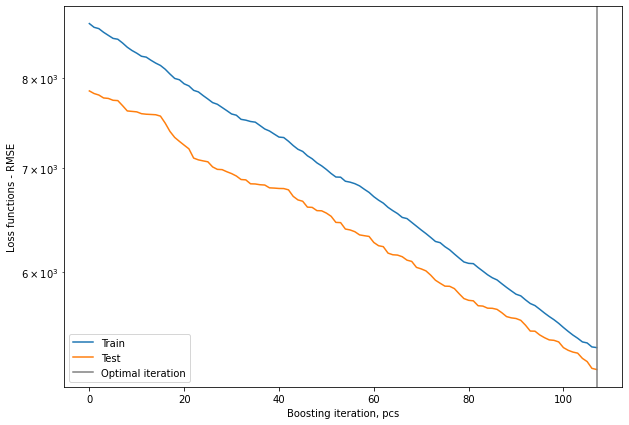

In [244]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(results['validation_0']['rmse'], label='Train')
plt.plot(results['validation_1']['rmse'], label='Test')
plt.axvline(optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a basic XGBoost model

# Test (validation) observations

In [245]:
# Convert data to 'array' type
conv_y_pred = pd.DataFrame(y_pred) # Double transformation
y_pred2 = conv_y_pred.values
y_test2 = y_test.values

# Intermediate results
n_sample = len(y_pred2)
main_sample = y_test.sum() / n_sample

# Calculation of bias
diff = y_pred2 - y_test2
bias = diff.sum()
print('Bias: %.1f' % (bias/n_sample))
print("Relative bias(%):", " %.2f" % (bias/main_sample))

# Calculation of RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %.1f" % (rmse))
print("Relative RMSE(%):", " %.3f" % (rmse/main_sample))

# Calculation of MSE
mse = mean_squared_error(y_test, y_pred)
print("MSE: %.1f" % (mse))

# Calculation of Square R
R_square = r2_score(y_test, y_pred)
print("R square: %.1f%%" % (R_square * 100.0))

Bias: -1505.9
Relative bias(%):  -28.72
RMSE: 5190.9
Relative RMSE(%):  1.571
MSE: 26945614.9
R square: 47.0%


In [246]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [247]:
# Convert input data
x_test_conv = np.array(y_test)
x_test_convert = np.array([None]*n_sample)
for i in range(n_sample):
    x_test_convert[i] = float(x_test_conv[i])

x_plot = x_test_convert
y_plot = y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

Optimal values of regression parameters
a0: 725.291
a1: 0.325
R^2: 0.783
Uncertainty
a0: (7.3+/-1.7)e+02
a1: 0.325+/-0.022


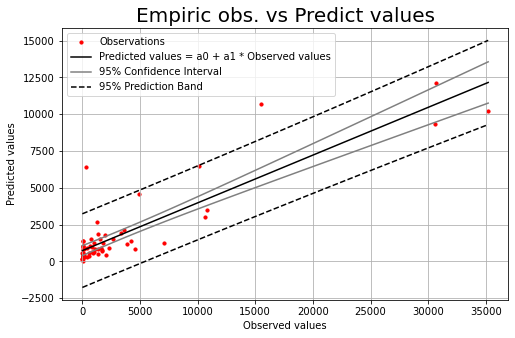

In [248]:
# Building linear a graph and calculation uncertainties
# retrieve parameter values
a0 = popt[0]
a1 = popt[1]
print('Optimal values of regression parameters')
print(f'a0: {a0:.3f}')
print(f'a1: {a1:.3f}')

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
r2 = round(r2, 3)
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# calculate regression confidence interval
px = np.linspace(1, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# All observations

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


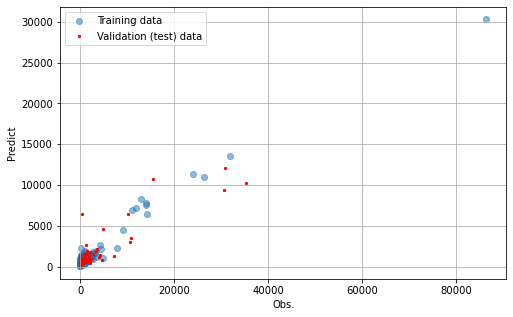

In [249]:
# Comparison of training and testing prediction values for XGBoost model 
y_pred_train = xgb_model.predict(X_train, ntree_limit=xgb_model.best_ntree_limit)

plt.figure(figsize =(8, 5))
plt.scatter(y_train, y_pred_train, alpha=0.5, label='Training data')
plt.scatter(y_test, y_pred, s = 5, c = "red", label='Validation (test) data')
plt.xlabel('Obs.')
plt.ylabel('Predict')
plt.grid(True)
plt.legend(loc='best')

# Estimation training sample

In [250]:
# Convert data to 'array' type
conv_y_pred = pd.DataFrame(y_pred_train) # Double transformation
y_pred_train2 = conv_y_pred.values
y_train2 = y_train.values

# Intermediate results
n_sample = len(y_pred_train2)
main_sample = y_train.sum() / n_sample

# Calculation of bias
diff = y_pred_train2 - y_train2
bias = diff.sum()
print('Bias: %.1f' % (bias/n_sample))
print("Relative bias(%):", " %.2f" % (bias/main_sample))

# Calculation of RMSE
rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
print("RMSE: %.1f" % (rmse))
print("Relative RMSE(%):", " %.3f" % (rmse/main_sample))

# Calculation of MSE
mse = mean_squared_error(y_train, y_pred_train)
print("MSE: %.1f" % (mse))

# Calculation of Square R
R_square = r2_score(y_train, y_pred_train)
print("R square: %.1f%%" % (R_square * 100.0))

Bias: -1047.6
Relative bias(%):  -62.12
RMSE: 5362.7
Relative RMSE(%):  2.178
MSE: 28758994.5
R square: 58.9%


In [251]:
# Convert input data
x_train_conv = np.array(y_train)
x_train_convert = np.array([None]*n_sample)
for i in range(n_sample):
    x_train_convert[i] = float(x_train_conv[i])

x_plot = x_train_convert
y_plot = y_pred_train
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

Optimal values of regression parameters
a0: 489.285
a1: 0.376
R^2: 0.961
Uncertainty
a0: (4.9+/-0.5)e+02
a1: 0.376+/-0.006


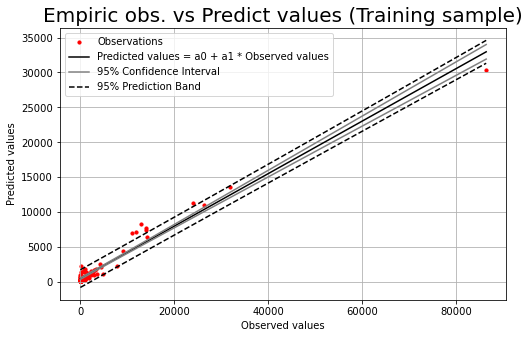

In [252]:
# Building linear a graph and calculation uncertainties
# retrieve parameter values
a0 = popt[0]
a1 = popt[1]
print('Optimal values of regression parameters')
print(f'a0: {a0:.3f}')
print(f'a1: {a1:.3f}')

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
r2 = round(r2, 3)
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# calculate regression confidence interval
px = np.linspace(1, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values (Training sample)', fontsize=20, color="black")
plt.show()

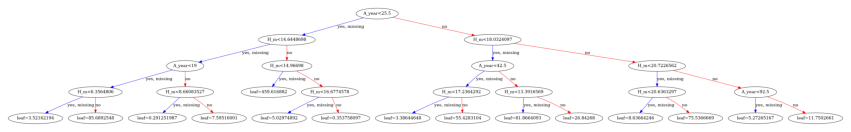

In [254]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(xgb_model,num_trees=0) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [15, 45]
plt.show()

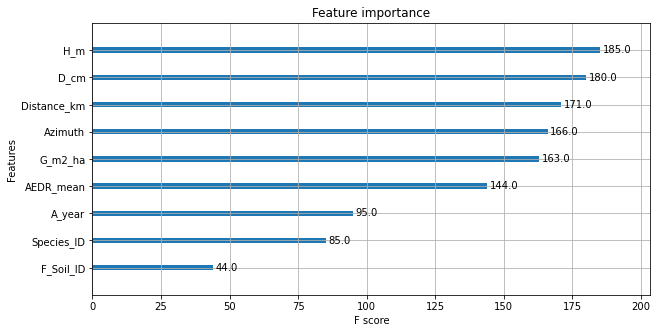

In [256]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

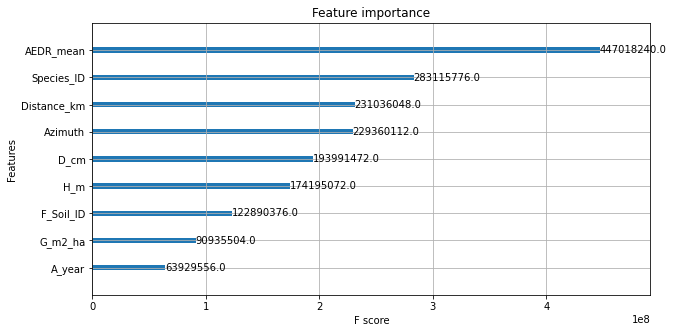

In [257]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

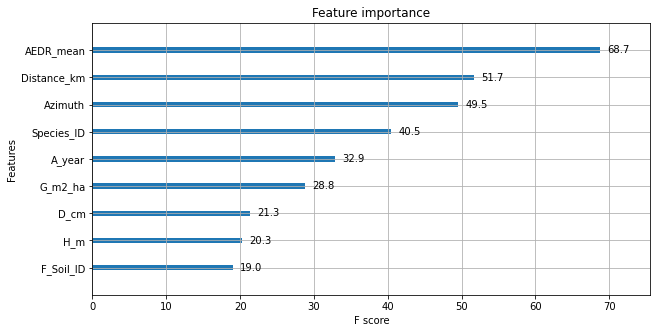

In [258]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# SHAP method

In [259]:
# Load SHAP`s library
import shap

In [260]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


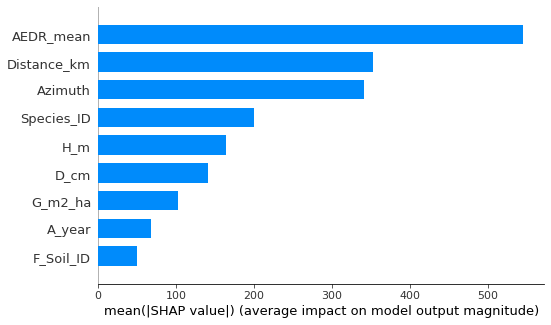

In [261]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, X_train, plot_type="bar")

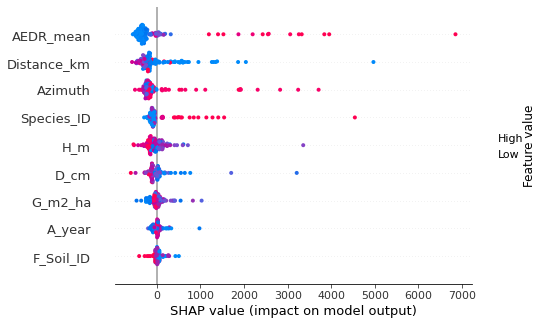

In [262]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, X_train)

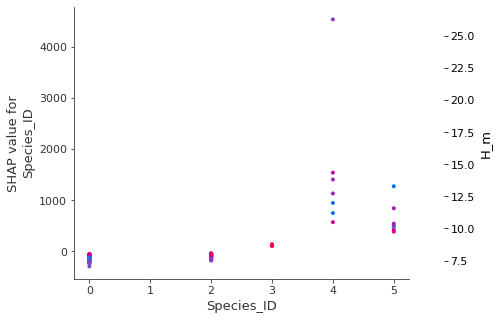

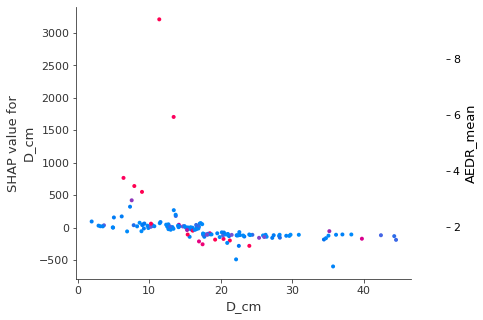

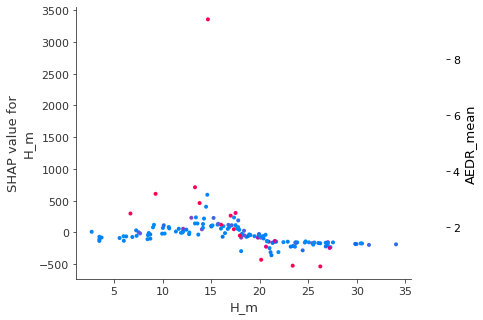

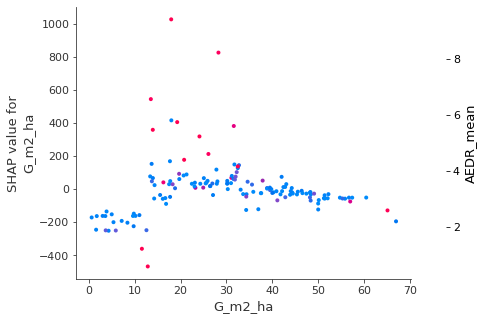

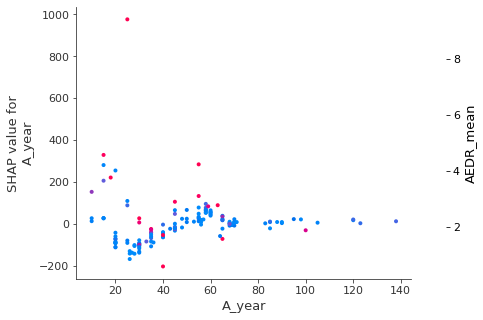

ValueError: Passing parameters norm and vmin/vmax simultaneously is not supported. Please pass vmin/vmax directly to the norm when creating it.

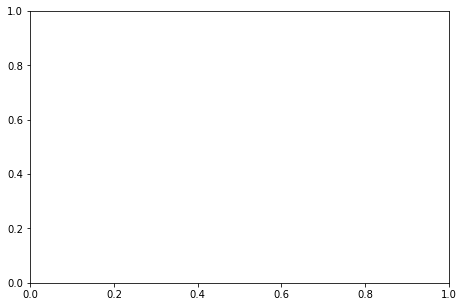

In [263]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, X_train, color=shap_values)

# ***Training on all data***

# Creating a final XGBoost model

In [264]:
# Generate test and training samples
f_X_train = X
f_y_train = y

In [265]:
# Implementation of the scikit-learn API for XGBoost regression
f_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [266]:
# Fitting the model 
f_xgb_model.fit(f_X_train, f_y_train, early_stopping_rounds=20, eval_set=[(f_X_train, f_y_train)])
# learning dynamics
f_y_pred = f_xgb_model.predict(f_X_train, ntree_limit=f_xgb_model.best_ntree_limit)

[0]	validation_0-rmse:8430.16254
[1]	validation_0-rmse:8378.42420
[2]	validation_0-rmse:8343.47085
[3]	validation_0-rmse:8309.23752
[4]	validation_0-rmse:8271.98176
[5]	validation_0-rmse:8224.75595
[6]	validation_0-rmse:8210.99368
[7]	validation_0-rmse:8172.82135
[8]	validation_0-rmse:8137.45446
[9]	validation_0-rmse:8088.17715


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:8048.44028
[11]	validation_0-rmse:8008.13014
[12]	validation_0-rmse:7959.08191
[13]	validation_0-rmse:7922.74134
[14]	validation_0-rmse:7889.76592
[15]	validation_0-rmse:7840.24503
[16]	validation_0-rmse:7796.29993
[17]	validation_0-rmse:7740.99786
[18]	validation_0-rmse:7686.45278
[19]	validation_0-rmse:7678.42544
[20]	validation_0-rmse:7632.14619
[21]	validation_0-rmse:7587.59904
[22]	validation_0-rmse:7542.31286
[23]	validation_0-rmse:7497.95276
[24]	validation_0-rmse:7450.01675
[25]	validation_0-rmse:7396.17438
[26]	validation_0-rmse:7352.12954
[27]	validation_0-rmse:7314.81590
[28]	validation_0-rmse:7267.69857
[29]	validation_0-rmse:7223.46998
[30]	validation_0-rmse:7180.23549
[31]	validation_0-rmse:7150.34972
[32]	validation_0-rmse:7119.70601
[33]	validation_0-rmse:7077.47009
[34]	validation_0-rmse:7037.65974
[35]	validation_0-rmse:7008.44557
[36]	validation_0-rmse:6976.94157
[37]	validation_0-rmse:6931.81481
[38]	validation_0-rmse:6889.27183
[39]	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [267]:
# Iteration with the best result
f_optimal_n = xgb_model.best_ntree_limit-1
print("The best iteration: " + str(f_optimal_n))    

The best iteration: 107


In [268]:
# Preparing data for building a learning graph
f_results = f_xgb_model.evals_result()

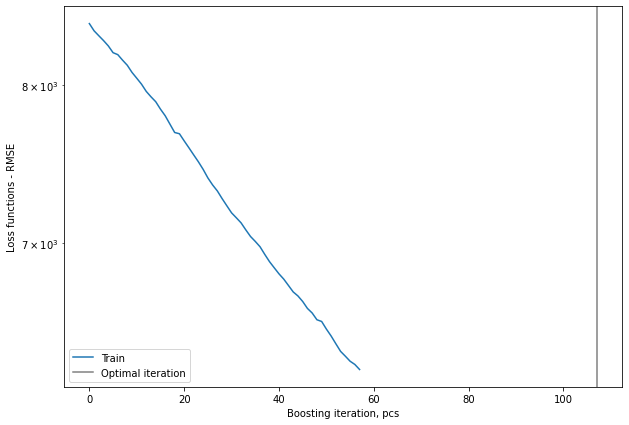

In [269]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(f_results['validation_0']['rmse'], label='Train')
plt.axvline(f_optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a final XGBoost model

In [270]:
# Convert data to 'array' type
f_conv_y_pred = pd.DataFrame(f_y_pred) # Double transformation
f_y_pred2 = f_conv_y_pred.values
f_y_train2 = f_y_train.values

# Intermediate results
f_n_sample = len(f_y_pred2)
f_main_sample = f_y_train.sum() / f_n_sample

# Calculation of bias
f_diff = f_y_pred2 - f_y_train2
f_bias = f_diff.sum()
print('Bias: %.1f' % (f_bias/f_n_sample))
print("Relative bias(%):", " %.2f" % (f_bias/f_main_sample))

# Calculation of RMSE
f_rmse = np.sqrt(mean_squared_error(f_y_train, f_y_pred))
print("RMSE: %.1f" % (f_rmse))
print("Relative RMSE(%):", " %.3f" % (f_rmse/f_main_sample))

# Calculation of MSE
f_mse = mean_squared_error(f_y_train, f_y_pred)
print("MSE: %.1f" % (f_mse))

# Calculation of Square R
f_R_square = r2_score(f_y_train, f_y_pred)
print("R square: %.1f%%" % (f_R_square * 100.0))

Bias: -1626.0
Relative bias(%):  -125.13
RMSE: 6287.3
Relative RMSE(%):  2.315
MSE: 39529794.1
R square: 38.6%


In [271]:
# Convert input data
f_x_train_conv = np.array(f_y_train)
f_x_train_convert = np.array([None]*f_n_sample)
for i in range(f_n_sample):
    f_x_train_convert[i] = float(f_x_train_conv[i])

x_plot = f_x_train_convert
y_plot = f_y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

Optimal values of regression parameters
a0: 420.617
a1: 0.246
R^2: 0.920
Uncertainty
a0: (4.2+/-0.4)e+02
a1: 0.246+/-0.005


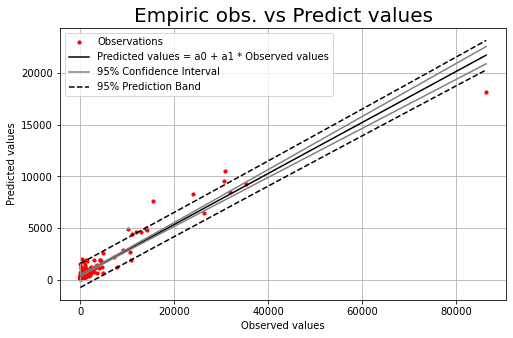

In [272]:
# Building linear a graph and calculation uncertainties
# retrieve parameter values
a0 = popt[0]
a1 = popt[1]
print('Optimal values of regression parameters')
print(f'a0: {a0:.3f}')
print(f'a1: {a1:.3f}')

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
f_r2 = round(r2, 3)
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# calculate regression confidence interval
px = np.linspace(0.001, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# *Save XGBoost model*

In [273]:
# Save to JSON
xgb_model.save_model("/home/dima/Desktop/JupyterLab/GIS and ML algoritms/4_RN_content_in_wood/Output_pred_data/xgb_model_Cs_with_geo.json")
# Save to text format
xgb_model.save_model("/home/dima/Desktop/JupyterLab/GIS and ML algoritms/4_RN_content_in_wood/Output_pred_data/xgb_model_Cs_with_geo.txt")